# Exploring dataset

In [6]:
# To support both python 2 and python 3

import itertools
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from __future__ import division, print_function, unicode_literals
from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
# Common imports
import numpy as np
from tsne import *
%matplotlib inline
import matplotlib.pyplot as plt
import os
from pandas.tools.plotting import scatter_matrix


# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [7]:
# Function to save figures
def save_fig(fig_id, tight_layout=True):
    path = os.path.join('./figures/', fig_id + ".png")
    print("Saving figure", fig_id)

    plt.savefig(path, format='png', dpi=300)

# Get the data

In [8]:
import pandas as pd

DATASET_PATH='data'

def load_data(input_file='year-prediction-msd-train.txt',dataset_path=DATASET_PATH):
    csv_ = os.path.join(dataset_path,input_file)
    return pd.read_csv(csv_)


In [9]:
data = load_data()
data.head()

,2004,46.50128,-18.37096,58.89824,27.28181,1.93097,-2.43167,18.64843,-5.62769,-1.47711,...,43.94716,-64.21148,13.04284,156.03785,-2.42670,51.71977,-43.56703,10.63735,24.08962,-21.41886
0,2005,41.46015,-52.30140,-4.59825,-19.28084,-11.85844,-19.54192,1.30306,-1.83185,5.98469,...,-13.48435,-154.65715,35.22429,89.53649,-3.13145,-128.28120,89.97277,-15.88139,-75.21074,-0.51139
1,2009,42.18667,-85.65863,-7.91506,-11.84193,-12.61959,-21.66749,4.97883,-11.86750,9.87342,...,42.08584,-181.77349,43.00181,87.94977,-13.70362,136.49979,140.32633,11.51422,382.79589,29.98269
2,1987,46.90244,19.86314,10.92119,4.87136,-41.17499,-19.84156,2.93308,-5.98711,3.05997,...,-2.76407,-20.31782,-75.24506,125.81801,-15.50828,-63.31002,-142.21937,-12.36699,32.45911,-17.14909
3,2009,46.64388,-81.99503,41.62851,3.65855,-9.38201,-13.51749,7.48781,-7.03302,7.06982,...,12.29244,-143.25348,91.15842,-227.85481,7.75916,-41.32376,-225.66526,-4.05081,455.39458,41.65310
4,2010,40.08240,-106.24846,41.81955,2.03363,-16.44993,-2.90037,-22.26724,-2.94540,11.63992,...,65.00995,-190.08468,-94.97429,-9.73645,-3.29013,51.91596,-320.37894,-5.58047,83.48503,-4.19480


/Users/so77id/.virtualenvs/cv3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


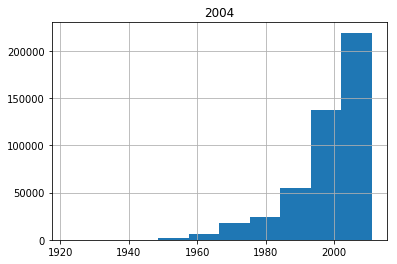

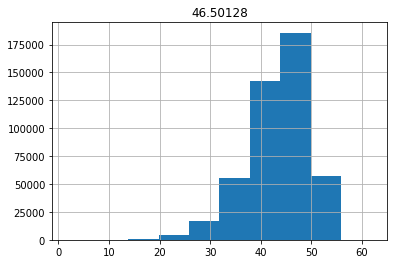

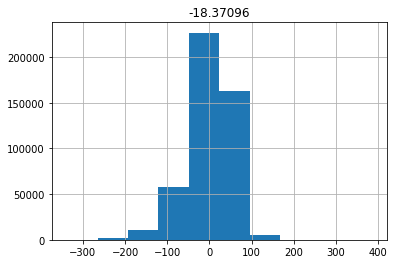

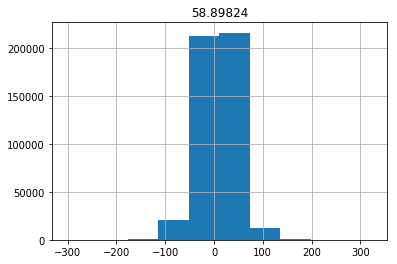

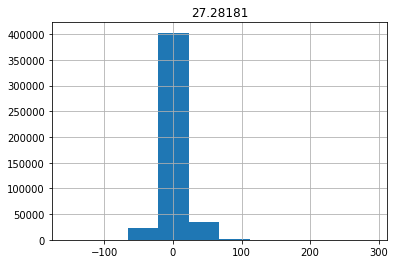

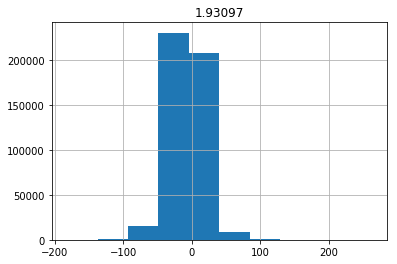

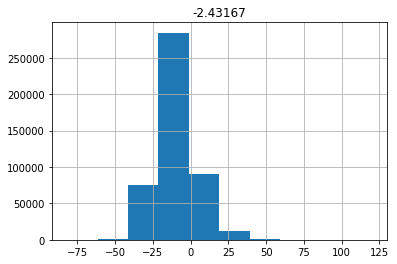

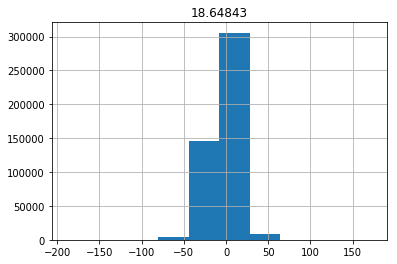

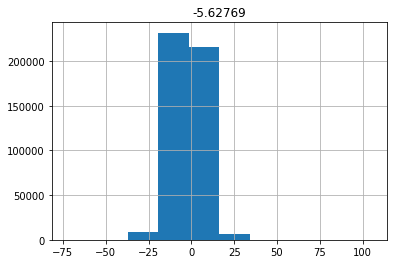

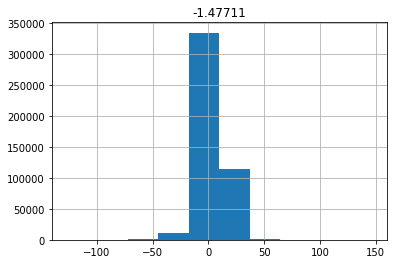

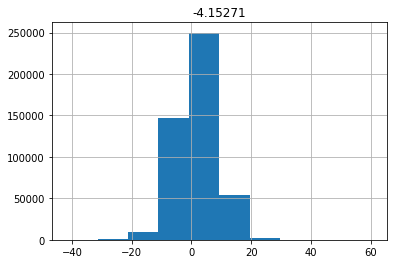

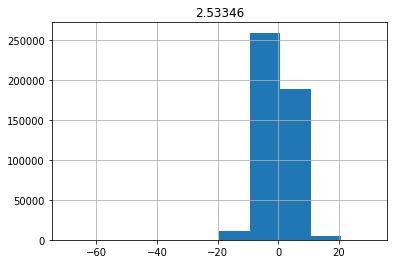

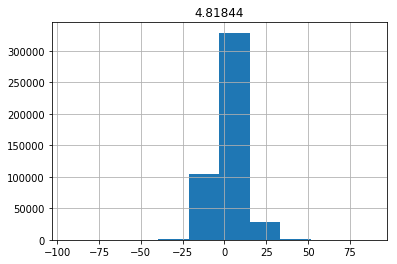

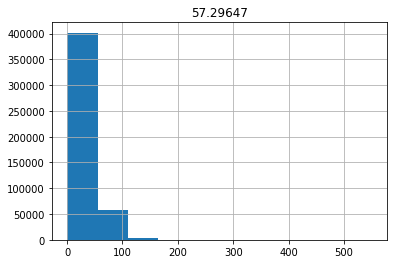

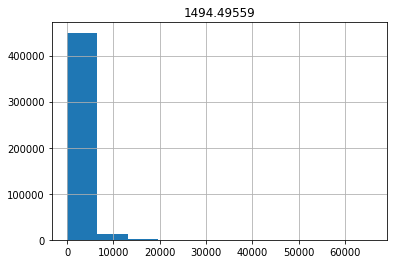

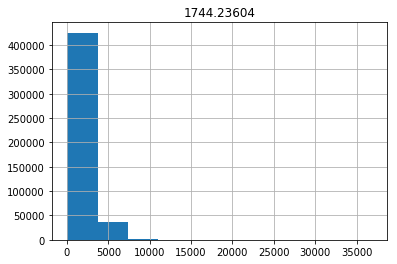

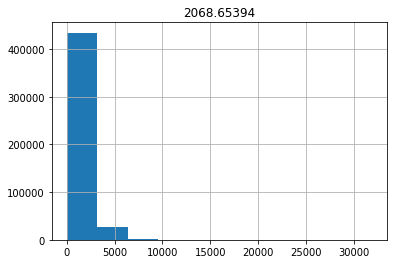

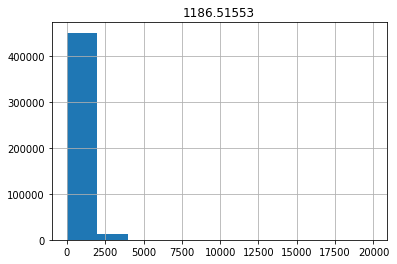

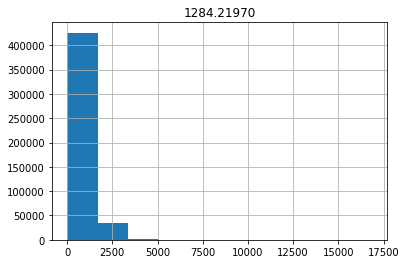

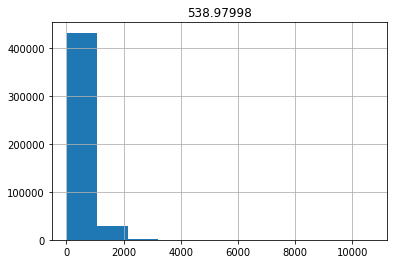

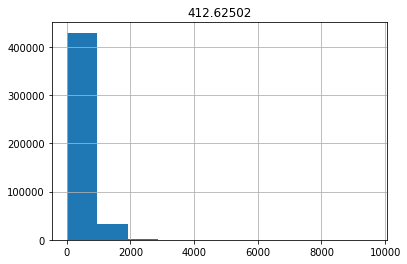

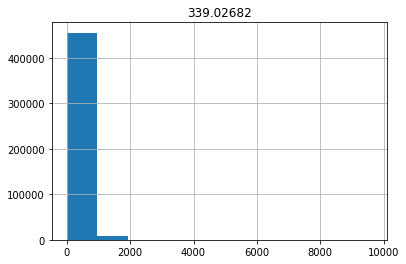

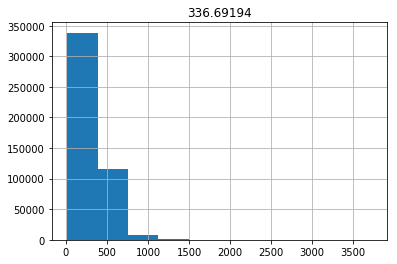

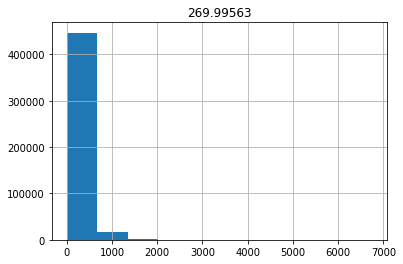

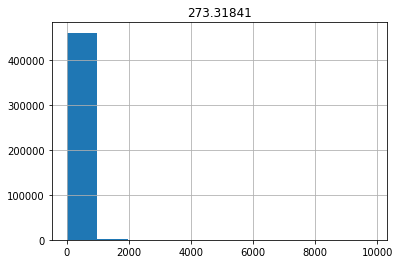

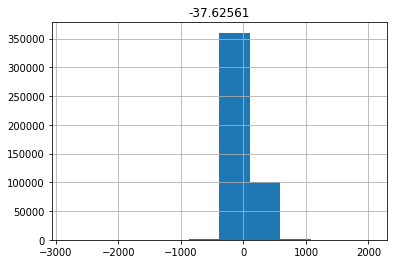

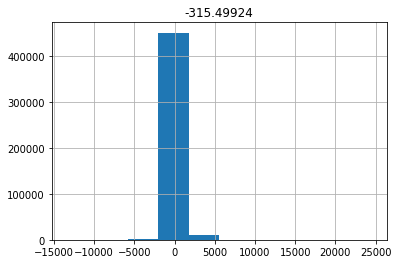

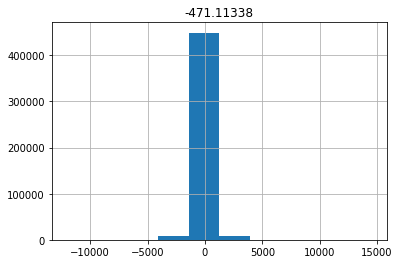

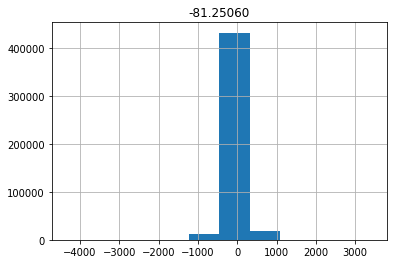

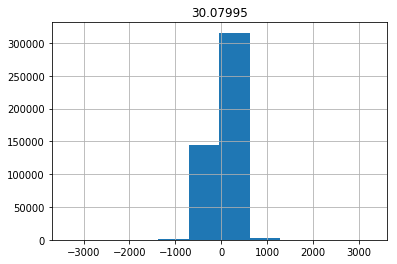

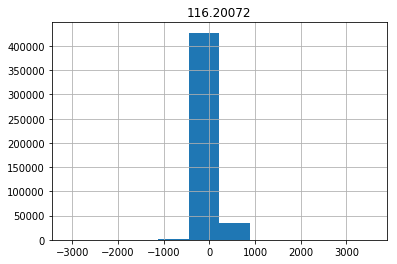

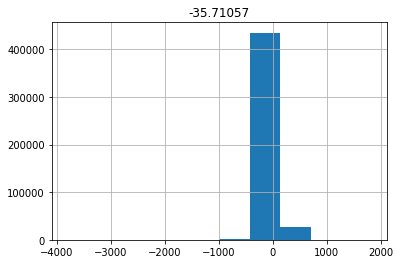

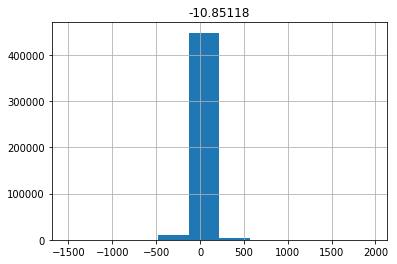

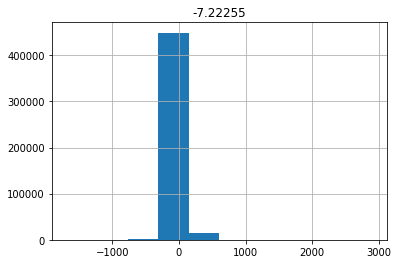

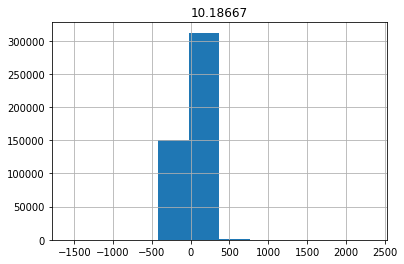

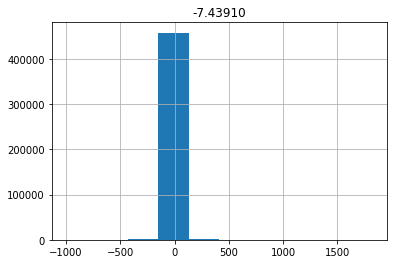

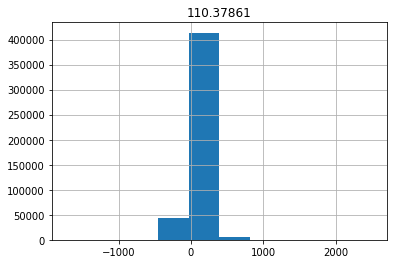

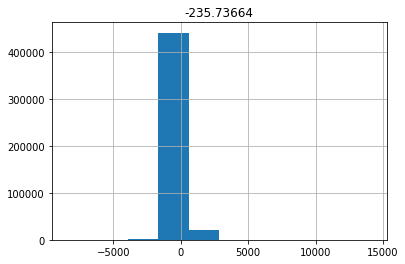

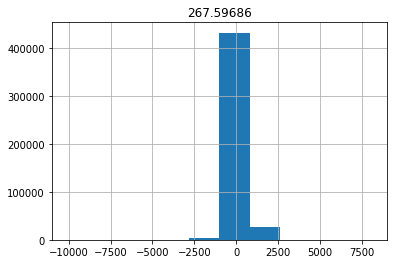

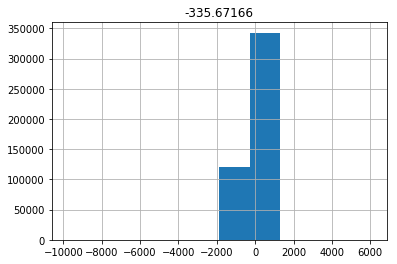

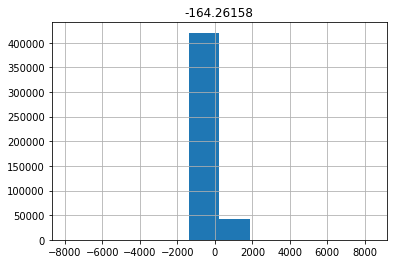

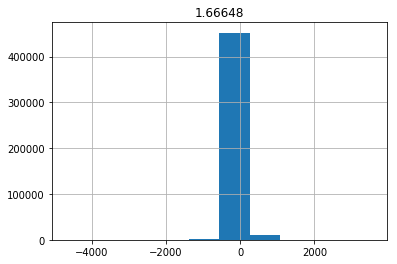

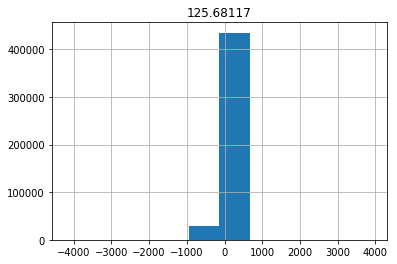

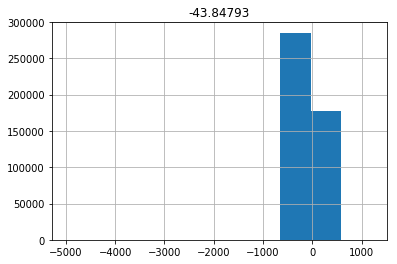

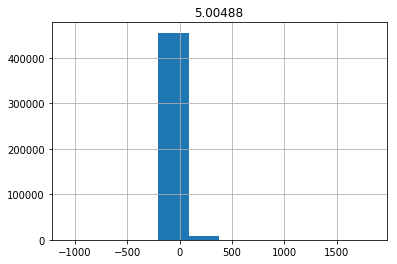

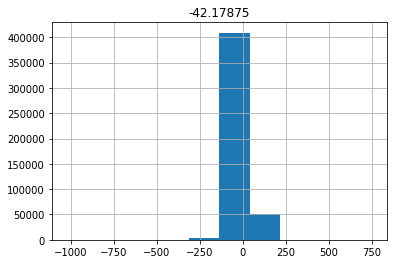

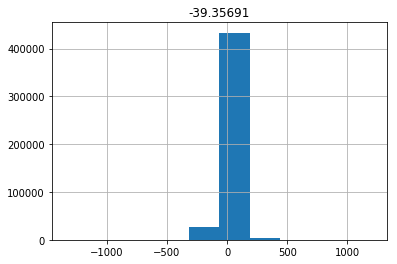

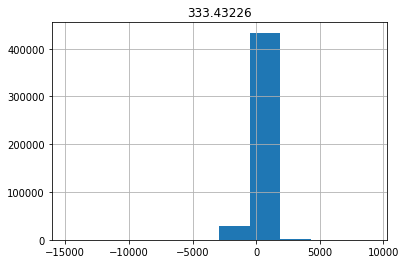

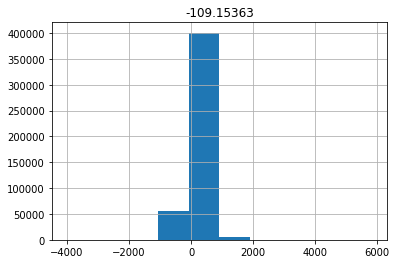

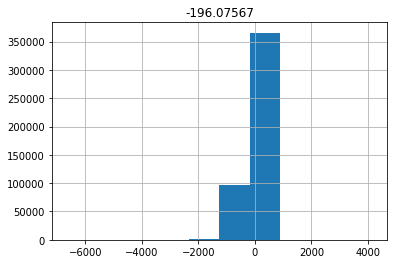

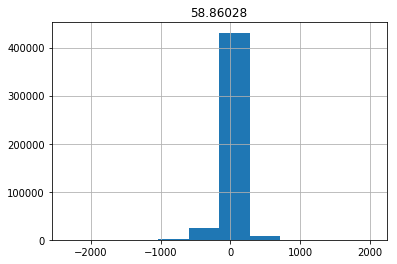

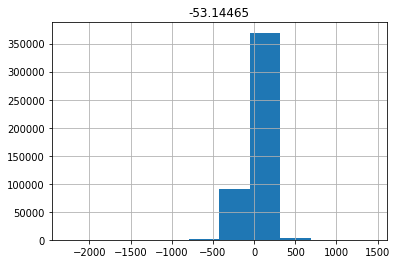

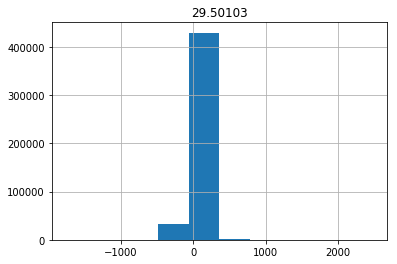

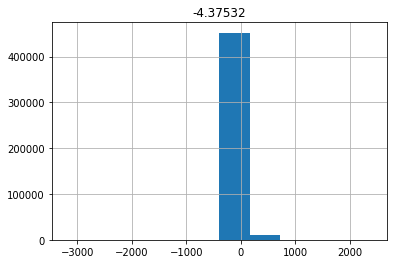

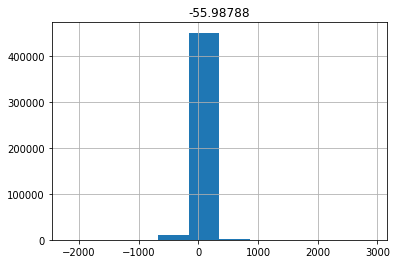

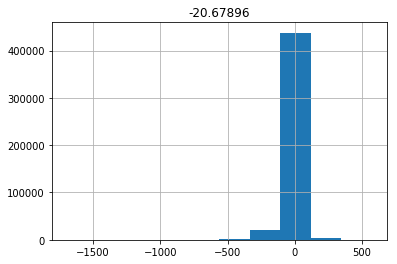

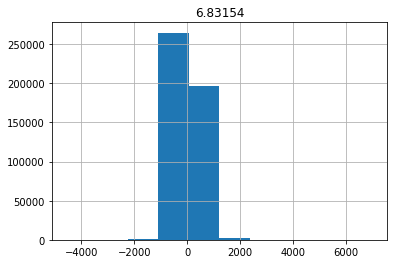

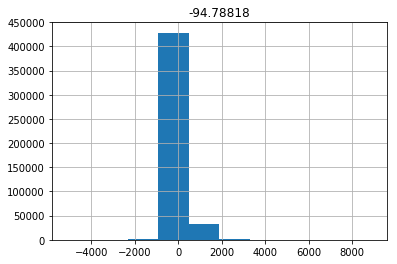

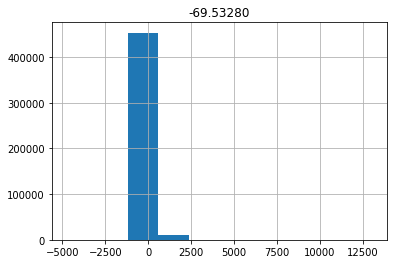

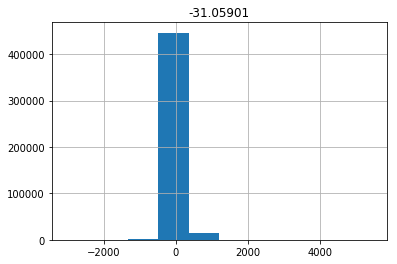

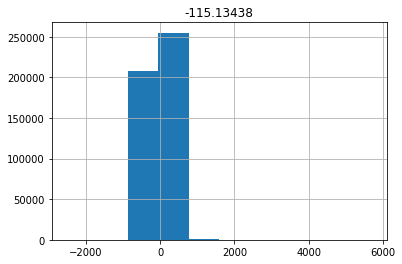

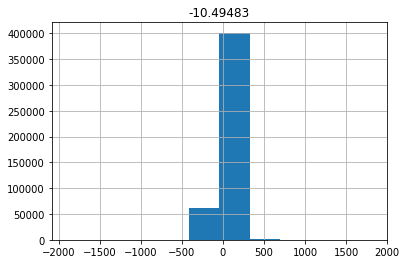

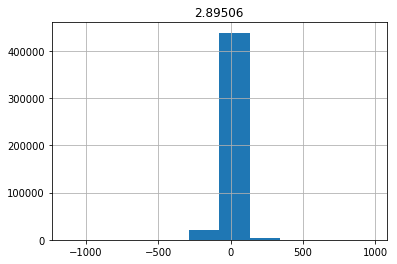

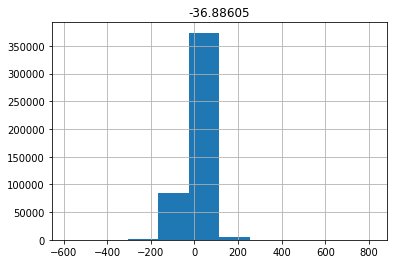

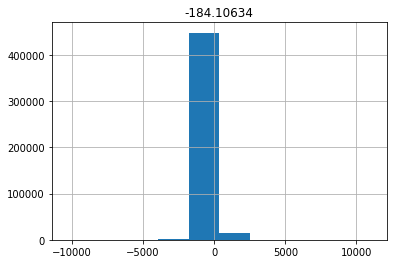

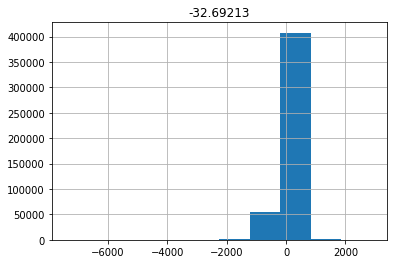

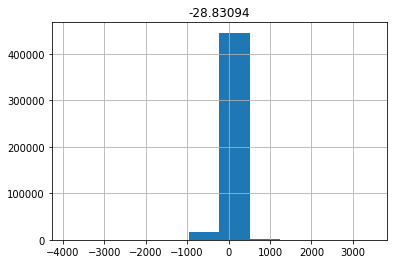

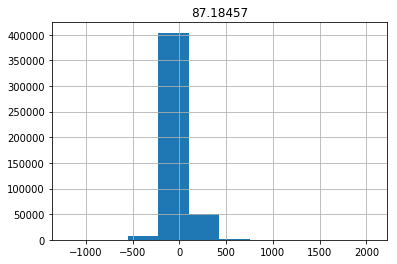

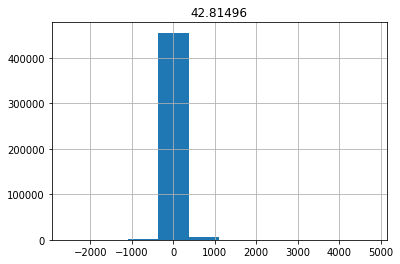

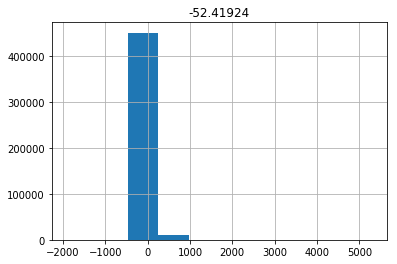

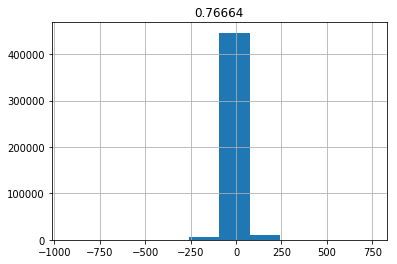

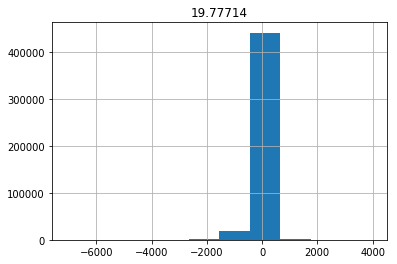

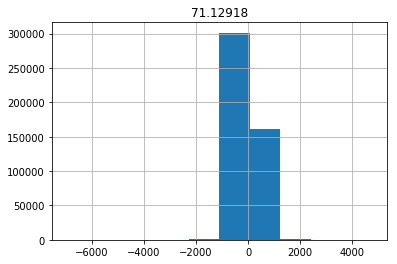

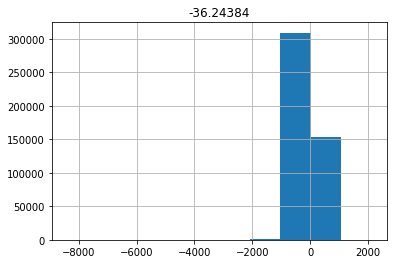

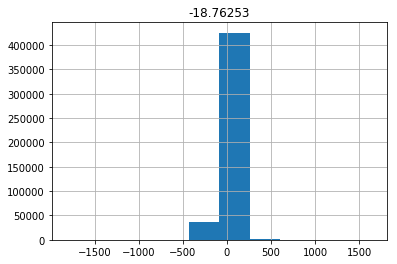

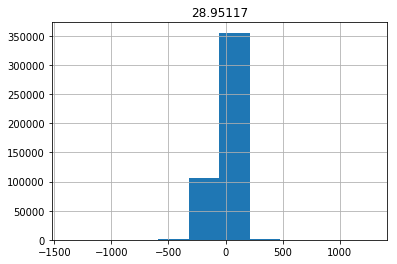

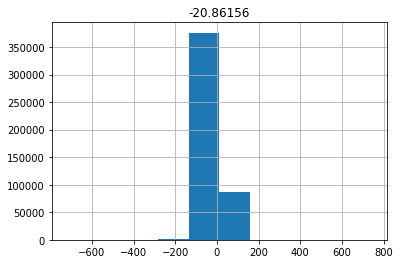

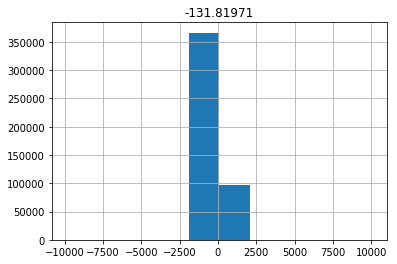

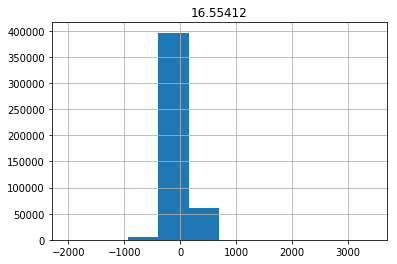

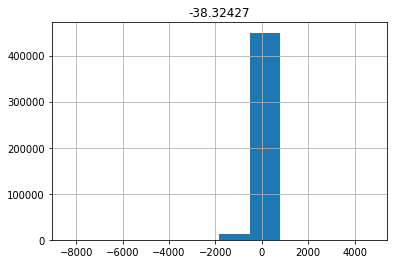

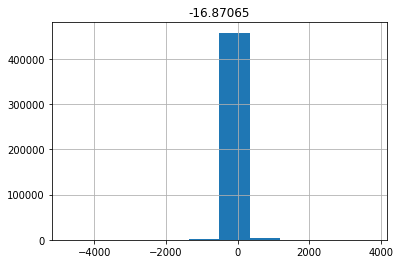

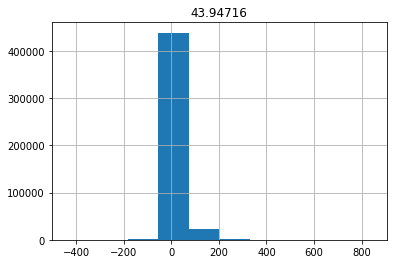

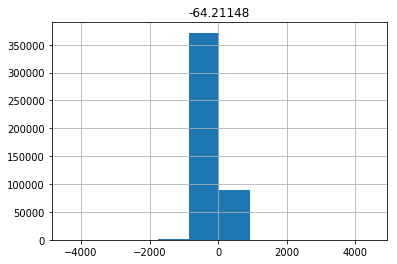

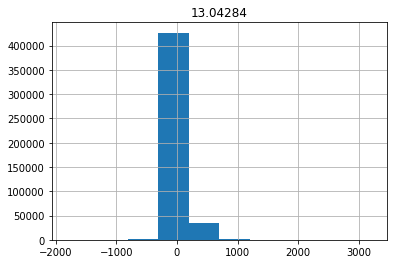

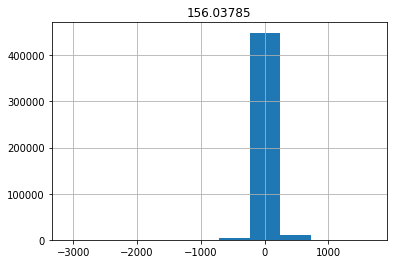

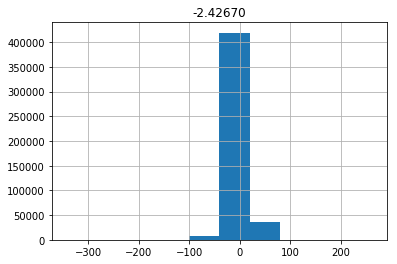

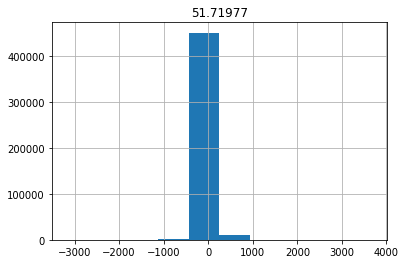

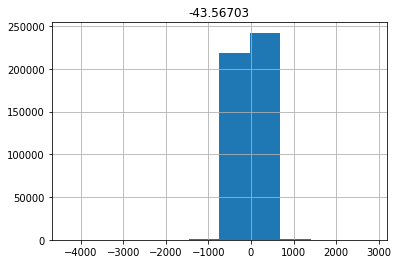

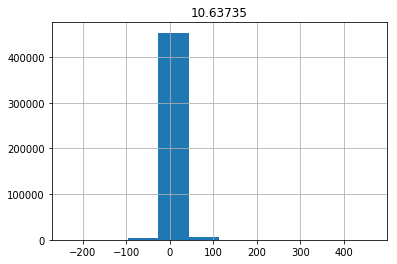

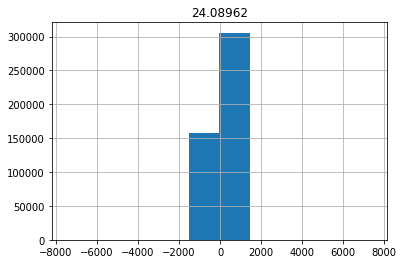

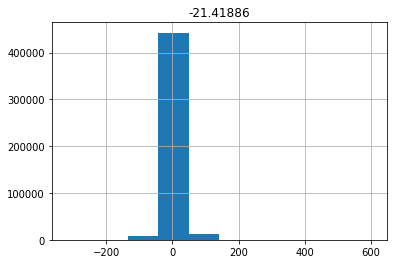

In [5]:
# understanding the features
for key in data.keys():
    data.hist(column=key)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463714 entries, 0 to 463713
Data columns (total 91 columns):
2004          463714 non-null int64
46.50128      463714 non-null float64
-18.37096     463714 non-null float64
58.89824      463714 non-null float64
27.28181      463714 non-null float64
1.93097       463714 non-null float64
-2.43167      463714 non-null float64
18.64843      463714 non-null float64
-5.62769      463714 non-null float64
-1.47711      463714 non-null float64
-4.15271      463714 non-null float64
2.53346       463714 non-null float64
4.81844       463714 non-null float64
57.29647      463714 non-null float64
1494.49559    463714 non-null float64
1744.23604    463714 non-null float64
2068.65394    463714 non-null float64
1186.51553    463714 non-null float64
1284.21970    463714 non-null float64
538.97998     463714 non-null float64
412.62502     463714 non-null float64
339.02682     463714 non-null float64
336.69194     463714 non-null float64
269.99563     463

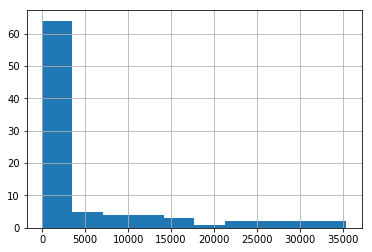

In [7]:
data['2004'].value_counts().hist()

In [8]:
data.describe()

,2004,46.50128,-18.37096,58.89824,27.28181,1.93097,-2.43167,18.64843,-5.62769,-1.47711,...,43.94716,-64.21148,13.04284,156.03785,-2.42670,51.71977,-43.56703,10.63735,24.08962,-21.41886
count,463714.000000,463714.000000,463714.000000,463714.000000,463714.000000,463714.000000,463714.000000,463714.000000,463714.000000,463714.000000,...,463714.000000,463714.000000,463714.000000,463714.000000,463714.000000,463714.000000,463714.000000,463714.000000,463714.000000,463714.000000
mean,1998.386083,43.385481,1.261133,8.650087,1.130707,-6.512743,-9.565542,-2.384655,-1.793713,3.714596,...,15.743300,-73.067772,41.424037,37.780613,0.345265,17.599207,-26.364788,4.444971,19.739297,1.323375
std,10.939776,6.079144,51.613520,35.264711,16.334645,22.855841,12.836767,14.580228,7.961883,10.579250,...,32.086364,175.377061,121.794735,94.874417,16.153814,114.336634,174.188078,13.321007,184.843703,22.045403
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-318.223330
25%,1994.000000,39.957530,-26.153930,-11.442085,-8.515182,-20.636970,-18.468742,-10.776340,-6.461440,-2.303615,...,-1.798107,-139.062248,-20.918968,-4.711530,-6.758210,-31.563707,-101.396848,-2.572830,-59.598090,-8.813270
50%,2002.000000,44.262535,8.371830,10.470505,-0.691625,-5.992770,-11.208865,-2.047855,-1.735415,3.816840,...,9.161290,-52.877875,28.710045,33.494500,0.828350,15.554445,-21.122785,3.111035,7.586750,0.052855
75%,2006.000000,47.833655,36.143790,29.741037,8.756865,7.749595,-2.422585,6.515638,2.905130,9.951140,...,26.248237,13.620905,89.419997,77.674595,8.495722,67.743898,52.300195,9.948947,86.203762,9.670785
max,2011.000000,61.970140,384.065730,322.851430,289.527430,262.068870,119.815590,172.402680,105.210280,146.297950,...,840.973380,4469.454870,3210.701700,1672.647100,260.544900,3662.065650,2833.608950,463.419500,7393.398440,600.766240


Saving figure attribute_histogram_plots


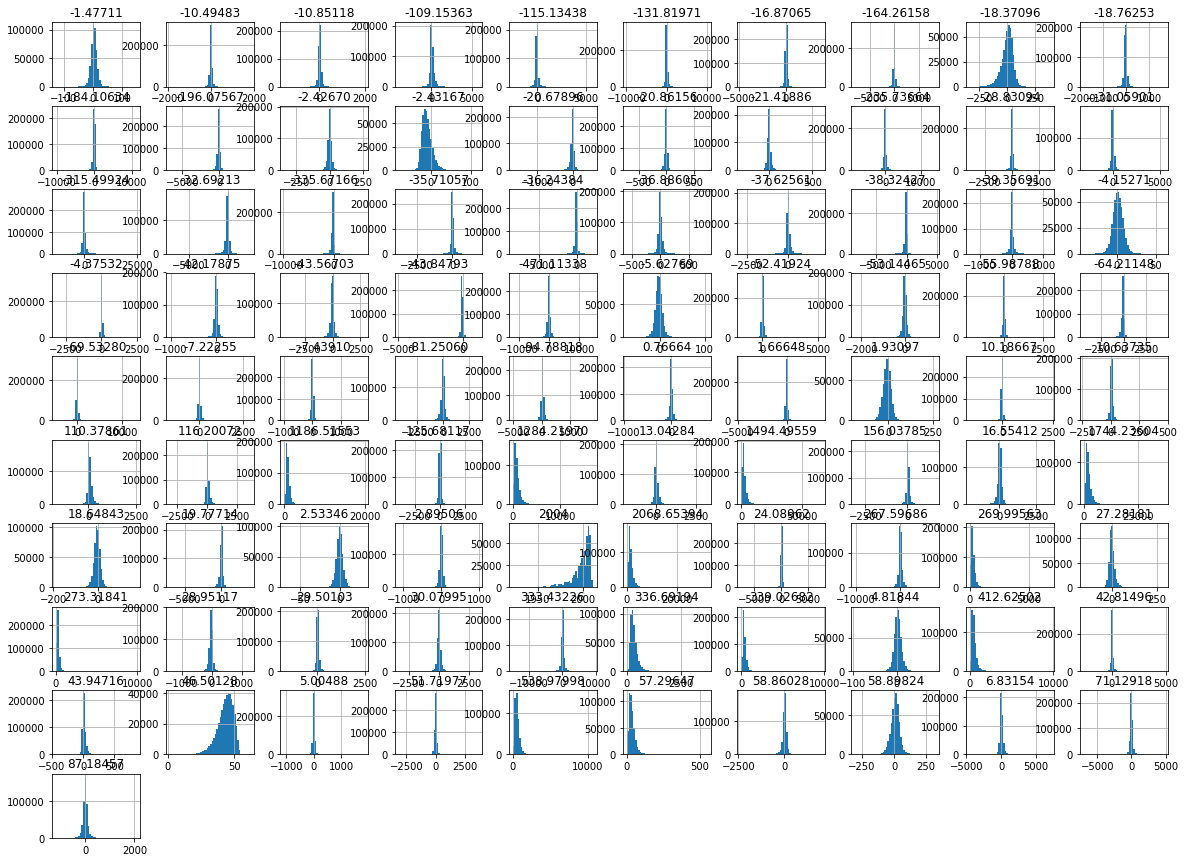

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

# Discover and visualize the data

In [10]:
#from pandas.tools.plotting import scatter_matrix

#attributes = ["2", "5", "6",
#              "10"]
#scatter_matrix(data[attributes], figsize=(12, 8))
#save_fig("scatter_matrix_plot")

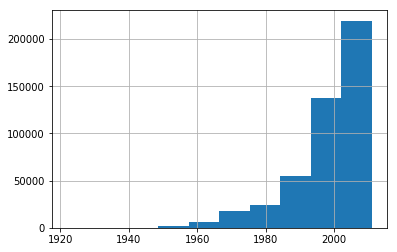

In [11]:
data['2004'].hist()

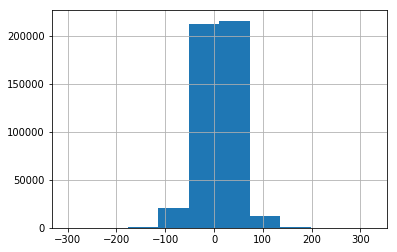

In [12]:
data['58.89824'].hist()

Saving figure scatter_matrix_plot


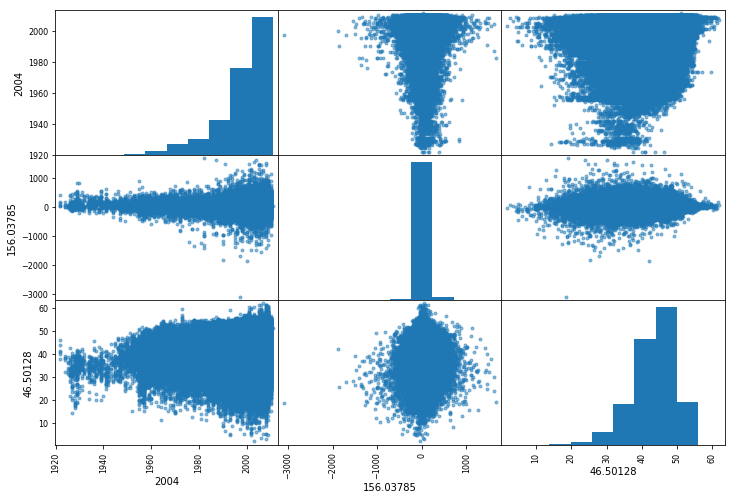

In [13]:
attributes = ["2004", "156.03785","46.50128"]
scatter_matrix(data[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

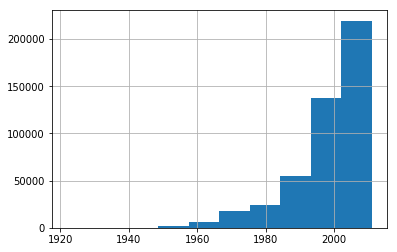

In [14]:
data['2004'].hist()

# Split data by features

In [10]:
# Dimensionality reduction
import numpy as np

avrg_X=[]
avrg_y=[]

cov_X=[]
cov_y=[]

for line in data.values:
    avrg_X.append(line[1:13])
    avrg_y.append(int(line[0]))

    cov_X.append(line[13:91])
    cov_y.append(int(line[0]))

avrg_X, avrg_y = np.array(avrg_X), np.array(avrg_y)
cov_X, cov_y   = np.array(cov_X), np.array(cov_y)

print("shape of avrg:", avrg_X.shape, avrg_y.shape)
print("shape of cov:", cov_X.shape, cov_y.shape)

shape of avrg: (463714, 12) (463714,)
shape of cov: (463714, 78) (463714,)


# Data normalize

In [11]:
# Normalize with (x - mean)/std
avrg_X = (avrg_X - avrg_X.mean(axis=0))/avrg_X.std(axis=0)

cov_X = (cov_X - cov_X.mean(axis=0))/cov_X.std(axis=0)

# PCA with to 2  features for mean, cov and all

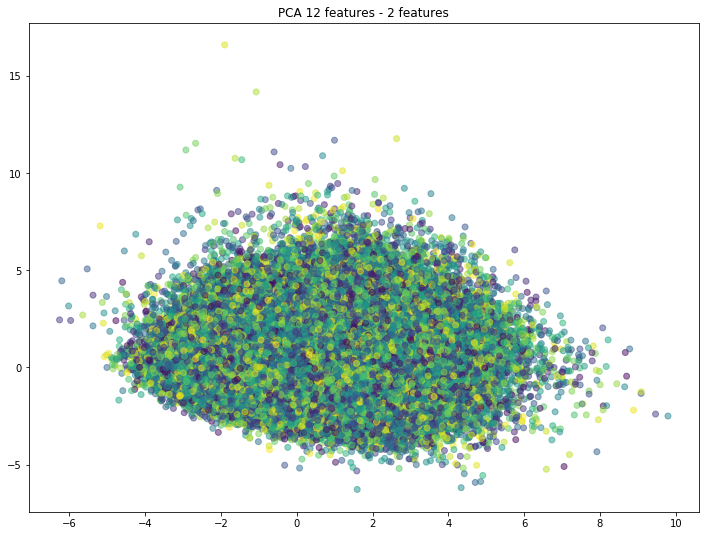

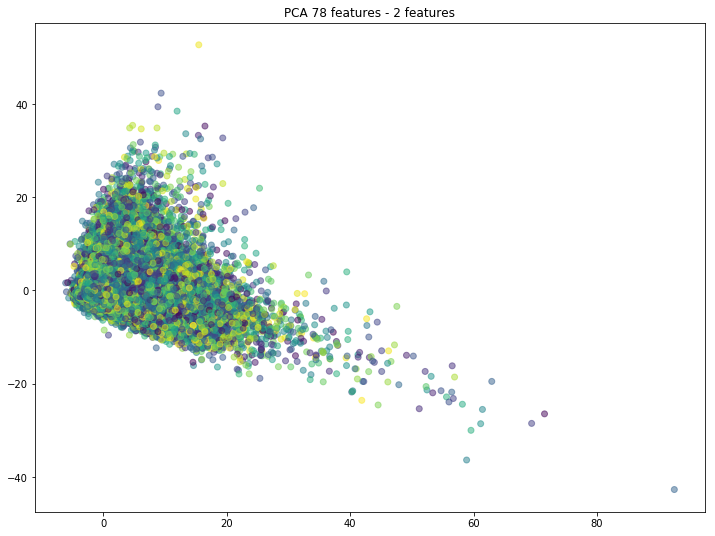

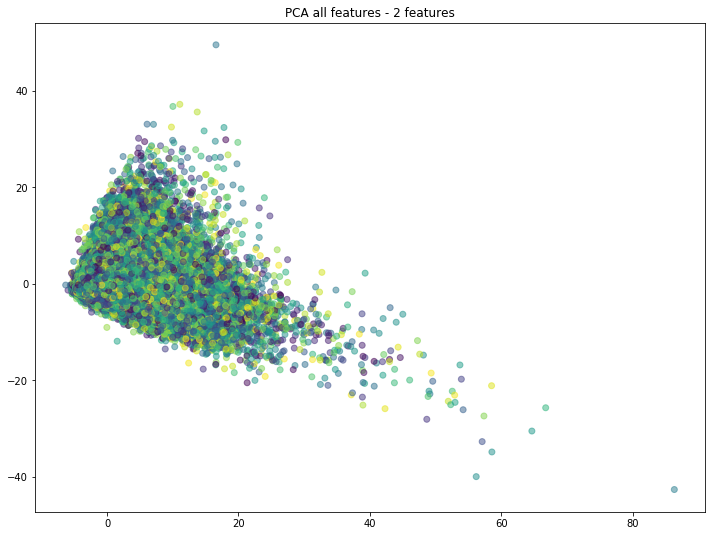

In [13]:
# feature reduction
from sklearn.decomposition import PCA

# mean features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(avrg_X)
N = len(X_pca)

colors = np.random.rand(N)

plt.figure(figsize=(12,9))
plt.title("PCA 12 features - 2 features")
plt.scatter(x=X_pca[:,0], y=X_pca[:,1], c=colors, alpha=0.5)
plt.show()

# mean features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(cov_X)
N = len(X_pca)


plt.figure(figsize=(12,9))
plt.title("PCA 78 features - 2 features")
plt.scatter(x=X_pca[:,0], y=X_pca[:,1], c=colors, alpha=0.5)
plt.show()

# mean features
X = np.concatenate((avrg_X,cov_X), axis=1)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
N = len(X_pca)


plt.figure(figsize=(12,9))
plt.title("PCA all features - 2 features")
plt.scatter(x=X_pca[:,0], y=X_pca[:,1], c=colors, alpha=0.5)
plt.show()

# PCA

In [ ]:
## Making feature reduction of avrg with PCA
from sklearn.decomposition import PCA
# Reduction to 2 components
pca = PCA(n_components=2)
avrg_X_pca_2 = pca.fit_transform(avrg_X)
print("Size of data after PCA with 2 components in argv:", avrg_X_pca_2.shape)

# Reduction to 6 components
pca = PCA(n_components=6)
avrg_X_pca_6 = pca.fit_transform(avrg_X)
print("Size of data after PCA with 6 components in argv:", avrg_X_pca_6.shape)

## Making feature reduction of conv with PCA
# Reduction to 10 components
pca = PCA(n_components=10)
cov_X_pca_10 = pca.fit_transform(cov_X)
print("Size of data after PCA with 10 components in cov:", cov_X_pca_10.shape)

# Reduction to 20 components
pca = PCA(n_components=20)
cov_X_pca_20 = pca.fit_transform(cov_X)
print("Size of data after PCA with 20 components in argv:", cov_X_pca_20.shape)

# Train models

## Baseline

In [23]:

# Baseline (Naive experiment)
from sklearn.metrics import mean_absolute_error

def baseline_experiment(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    classes, freq =  np.unique(y_train, return_counts=True)
    most_probable_class = classes[freq.argmax()]

    preds = np.ones(y_test.shape) * most_probable_class
    error = mean_absolute_error(y_test, preds)

    return error

bl_error = baseline_experiment(X, y)
print("Baseline error with all features:", bl_error)


avrg_bl_error = baseline_experiment(avrg_X, avrg_y)
print("Baseline error with all avrg features:", avrg_bl_error)

avrg_pca_2_bl_error = baseline_experiment(avrg_X_pca_2, avrg_y)
print("Baseline error with 2 avrg features:", avrg_pca_2_bl_error)

avrg_pca_6_bl_error = baseline_experiment(avrg_X_pca_6, avrg_y)
print("Baseline error with 6 avrg features:", avrg_pca_6_bl_error)


cov_bl_error = baseline_experiment(cov_X, cov_y)
print("Baseline error with all cov features:", cov_bl_error)

cov_pca_10_bl_error = baseline_experiment(cov_X_pca_10, cov_y)
print("Baseline error with 10 cov features:", cov_pca_10_bl_error)

cov_pca_10_bl_error = baseline_experiment(cov_X_pca_20, cov_y)
print("Baseline error with 20 cov features:", cov_pca_10_bl_error)


Baseline error with all features: 9.07861708459
Baseline error with all avrg features: 9.07861708459
Baseline error with 2 avrg features: 9.07861708459
Baseline error with 6 avrg features: 9.07861708459
Baseline error with all cov features: 9.07861708459
Baseline error with 10 cov features: 9.07861708459
Baseline error with 20 cov features: 9.07861708459


## Normal Equation Approach

In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def rl_normal_equation_experiment(X, y, test_size=0.25, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    clf = LinearRegression(normalize=True)
    clf.fit(X_train,y_train)

    preds = clf.predict(X_test)
    error = mean_absolute_error(y_test, preds)

    return error

In [38]:
# Test Normal equation with all avrg features
avrg_neq_error = rl_normal_equation_experiment(avrg_X, avrg_y)
print("Normal equation error with all avrg features:", avrg_neq_error)
# Test Normal equation with avrg PCA = 2
avrg_pca_2_neq_error = rl_normal_equation_experiment(avrg_X_pca_2, avrg_y)
print("Normal equation error with 2 avrg features:", avrg_pca_2_neq_error)
# Test Normal equation with avrg PCA = 6
avrg_pca_6_neq_error = rl_normal_equation_experiment(avrg_X_pca_6, avrg_y)
print("Normal equation error with 6 avrg features:", avrg_pca_6_neq_error)
# Test Normal equation with all cov features
cov_neq_error = rl_normal_equation_experiment(cov_X, cov_y)
print("Normal equation error with all features:", cov_neq_error)
# Test Normal equation with cov PCA = 10
cov_pca_10_neq_error = rl_normal_equation_experiment(cov_X_pca_10, cov_y)
print("Normal equation error with 10 cov features:", cov_pca_10_neq_error)
# Test Normal equation with cov PCA = 20
cov_pca_20_neq_error = rl_normal_equation_experiment(cov_X_pca_20, cov_y)
print("Normal equation error with 20 cov features:", cov_pca_20_neq_error)


Normal equation error with all avrg features: 7.21535926472
Normal equation error with 2 avrg features: 8.07156183923
Normal equation error with 6 avrg features: 7.86318868097
Normal equation error with all features: 7.61717513772
Normal equation error with 10 cov features: 7.89218129404
Normal equation error with 20 cov features: 7.78351668732


In [29]:
# Using better results in avrg and cov
X_pca = np.concatenate((avrg_X, cov_X), axis=1)
pca_neq_error = rl_normal_equation_experiment(X_pca, cov_y)
print("Normal equation error with better results cov features:", pca_neq_error)

Normal equation error with better results cov features: 6.79413057717


## Gradient decent approach

## Linear regression

In [30]:
# Gradient descent approach
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

def print_error_graph(errors, lrs_index, lrs_labels):
    plt.title("Gradient Descent learning rates error comparison")
    line = plt.plot(errors, marker='o', label='Learning rate')
    plt.xticks(lrs_index, lrs_labels,fontsize=14, rotation='vertical')
    #plt.legend(handles=[line], loc=4)

    plt.show()

def gd_linear(X, y, learning_rate, test_size=0.25, random_state=42):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

    sgd_reg = SGDRegressor(max_iter=1000,penalty=None,
                           eta0=learning_rate,
                           loss='squared_loss')

    sgd_reg.fit(X_train,y_train)

    preds = sgd_reg.predict(X_val)
    error = mean_absolute_error(preds, y_val)

    return error

lrs = [0.0001,0.0003,0.0004,0.0005,0.0007]
lrs_labels = [str(item) for item in lrs]
lrs_index=range(len(lrs))

In [31]:
def parameter_search(X, y, lrs, PCA):
    errors = []
    for learning_rate in lrs:
        error = gd_linear(X, y, learning_rate)
        print("Linear regression error of avrg PCA=", PCA, " with learning_rate:", learning_rate, "error:", error)
        errors.append(error)

    print_error_graph(errors, lrs_index, lrs_labels)

AVRG
Linear regression error of avrg PCA= None  with learning_rate: 0.0001 error: 7.21537833316
Linear regression error of avrg PCA= None  with learning_rate: 0.0003 error: 7.21500187496
Linear regression error of avrg PCA= None  with learning_rate: 0.0004 error: 7.2161553221
Linear regression error of avrg PCA= None  with learning_rate: 0.0005 error: 7.21450902643
Linear regression error of avrg PCA= None  with learning_rate: 0.0007 error: 7.2167819297


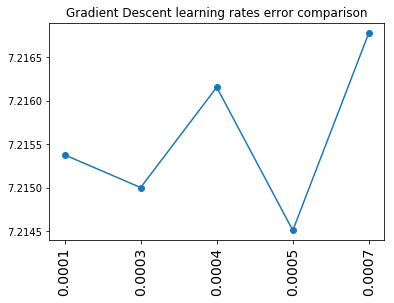

In [32]:
# AVRG All
print("AVRG")
parameter_search(avrg_X, avrg_y, lrs, "None")

AVRG PCA 2
Linear regression error of avrg PCA= 2  with learning_rate: 0.0001 error: 8.0713321141
Linear regression error of avrg PCA= 2  with learning_rate: 0.0003 error: 8.07107477854
Linear regression error of avrg PCA= 2  with learning_rate: 0.0004 error: 8.07330469667
Linear regression error of avrg PCA= 2  with learning_rate: 0.0005 error: 8.07043641521
Linear regression error of avrg PCA= 2  with learning_rate: 0.0007 error: 8.07085515855


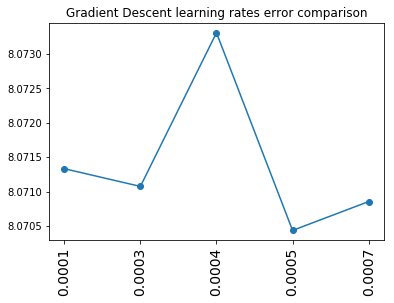

In [33]:
# AVRG PCA 2
print("AVRG PCA 2")
parameter_search(avrg_X_pca_2, avrg_y, lrs, 2)

AVRG PCA 6
Linear regression error of avrg PCA= 6  with learning_rate: 0.0001 error: 7.86328247927
Linear regression error of avrg PCA= 6  with learning_rate: 0.0003 error: 7.86375298477
Linear regression error of avrg PCA= 6  with learning_rate: 0.0004 error: 7.86279659913
Linear regression error of avrg PCA= 6  with learning_rate: 0.0005 error: 7.86463257329
Linear regression error of avrg PCA= 6  with learning_rate: 0.0007 error: 7.86557685471


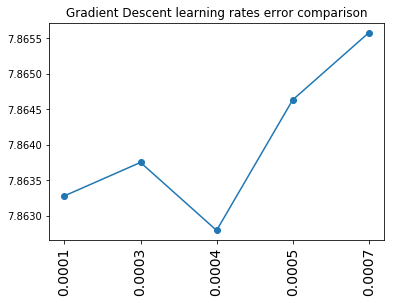

In [34]:
# AVRG PCA 6
print("AVRG PCA 6")
parameter_search(avrg_X_pca_6, avrg_y, lrs, 6)

COV PCA 10
Linear regression error of avrg PCA= 10  with learning_rate: 0.0001 error: 7.89235123947
Linear regression error of avrg PCA= 10  with learning_rate: 0.0003 error: 7.89166549689
Linear regression error of avrg PCA= 10  with learning_rate: 0.0004 error: 7.89304784628
Linear regression error of avrg PCA= 10  with learning_rate: 0.0005 error: 7.89262259684
Linear regression error of avrg PCA= 10  with learning_rate: 0.0007 error: 7.89537747255


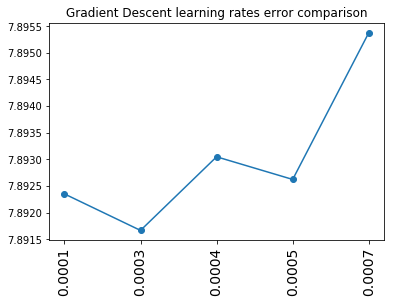

In [35]:
# COV PCA 10
print("COV PCA 10")
parameter_search(cov_X_pca_10, avrg_y, lrs, 10)

COV PCA 20
Linear regression error of avrg PCA= 20  with learning_rate: 0.0001 error: 7.78345581047
Linear regression error of avrg PCA= 20  with learning_rate: 0.0003 error: 7.78235840985
Linear regression error of avrg PCA= 20  with learning_rate: 0.0004 error: 7.78671241607
Linear regression error of avrg PCA= 20  with learning_rate: 0.0005 error: 7.78531632712
Linear regression error of avrg PCA= 20  with learning_rate: 0.0007 error: 7.78600404044


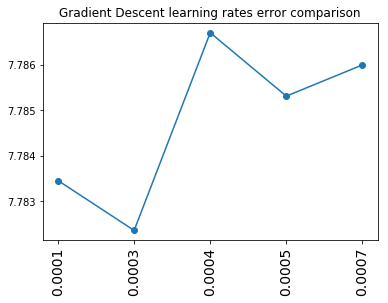

In [36]:
# COV PCA 20
print("COV PCA 20")
parameter_search(cov_X_pca_20, avrg_y, lrs, 20)

Merge of better results
Linear regression error of avrg PCA= All  with learning_rate: 0.0001 error: 7.44424369418
Linear regression error of avrg PCA= All  with learning_rate: 0.0003 error: 7.44403629697
Linear regression error of avrg PCA= All  with learning_rate: 0.0004 error: 7.44346861122
Linear regression error of avrg PCA= All  with learning_rate: 0.0005 error: 7.44557322596
Linear regression error of avrg PCA= All  with learning_rate: 0.0007 error: 7.4442959852


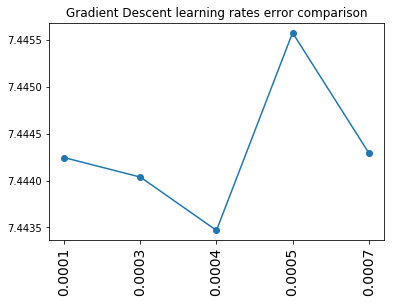

In [37]:
# Using better results in avrg and cov
print("Merge of better results")
X_pca = np.concatenate((avrg_X_pca_6, cov_X_pca_20), axis=1)
parameter_search(X_pca, avrg_y, lrs, "All")

## Polynomial regression

In [1]:
# Polynomial Regression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


def gd_polynomial(X, y, degree):
    X_train, X_val, y_train, y_val = train_test_split(avrg_X, avrg_y, test_size=0.25, random_state=42)
    
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    preds = model.predict(X_val)

    error = mean_absolute_error(preds, y_val)
    
    return error

degrees = [1, 2, 3, 4]
d_labels = [str(item) for item in degrees]
d_index  = range(len(degrees))

In [ ]:
def parameter_search(X, y, degrees, PCA):
    errors = []
    for degree in degrees:
        error = gd_polynomial(X, y, degree)
        errors.append(error)
        print("Polynomial regression error of", "degre:", degree, "PCA:", PCA, "error:", error)        
        
    print_error_graph(errors, lrs_index, lrs_labels)

In [ ]:
# AVRG ALL
print("AVRG")
parameter_search(avrg_X, avrg_y, degrees, "None")

In [ ]:
# AVRG PCA 2
print("AVRG PCA 2")
parameter_search(avrg_X_pca_2, avrg_y, degrees, 2)

In [ ]:
# AVRG PCA 6
print("AVRG PCA 6")
parameter_search(avrg_X_pca_6, avrg_y, degrees, 6)

In [ ]:
# COV PCA 10
print("COV PCA 10")
parameter_search(cov_X_pca_10, avrg_y, degrees, 10)

In [ ]:
# COV PCA 20
print("COV PCA 20")
parameter_search(cov_X_pca_20, avrg_y, degrees, 20)

In [ ]:
# Using better results in avrg and cov
print("Merge of better results")
X_pca = np.concatenate((avrg_X_pca_6, cov_X_pca_20), axis=1)
parameter_search(X_pca, avrg_y, degrees, "all")

# Regularization ?

/Users/so77id/.virtualenvs/cv3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


error :  7.37595696802


/Users/so77id/.virtualenvs/cv3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


error :  7.1729428503


/Users/so77id/.virtualenvs/cv3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:73: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


error :  7.33611625471


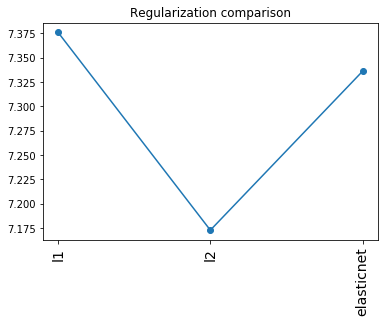

In [26]:
# analise regularizacao

regs = ['l1','l2','elasticnet']
regs_index = range(len(regs))
errors = []
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=22)

for reg in regs:

    sgd_reg = SGDRegressor(n_iter=500,penalty=reg,
                           eta0=0.0003,
                           loss='squared_loss')


    sgd_reg.fit(X_train,y_train)

    preds = sgd_reg.predict(X_val)
    err = mean_absolute_error(preds, y_val)

    print("error : ", err)
    errors.append(err)


plt.title("Regularization comparison")
line = plt.plot(errors, marker='o', label='Learning rate')
plt.xticks(regs_index, regs,fontsize=14, rotation='vertical')
#plt.legend(handles=[line], loc=4)

plt.show()

# Models comparison

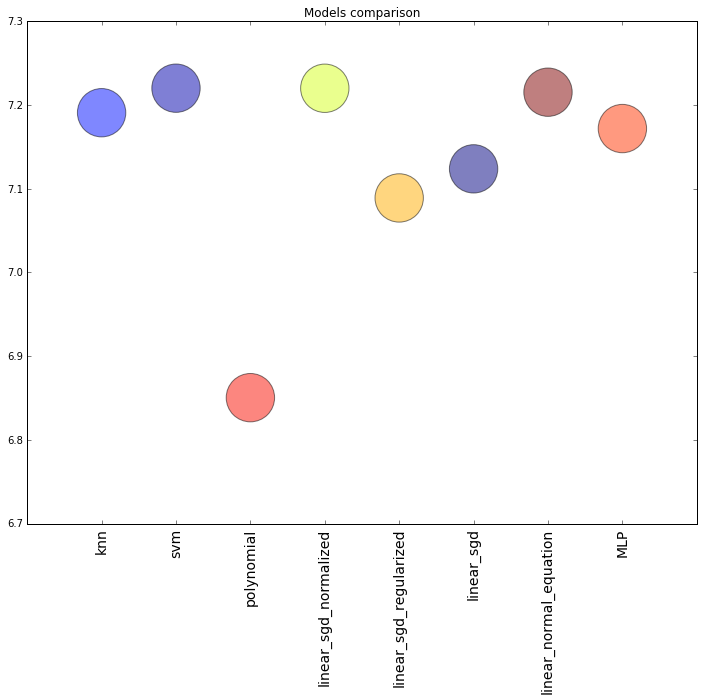

In [7]:
models = ["knn","svm","polynomial","linear_sgd_normalized","linear_sgd_regularized","linear_sgd","linear_normal_equation","MLP"]
errors = [7.1908424553,7.22015312448,6.85040287705,7.22005161634,7.08902482735,7.12377949615,7.21535926472,7.17191544945]

models_index = range(len(models))

colors = np.random.rand(len(models))
area = len(models)*[2337.90173216]

plt.figure(figsize=(12,9))
plt.title("Models comparison")

plt.title("Models comparison")
plt.scatter(models_index, errors,s=area, c=colors, alpha=0.5)
plt.xticks(models_index, models,fontsize=14, rotation='vertical')
plt.show()
